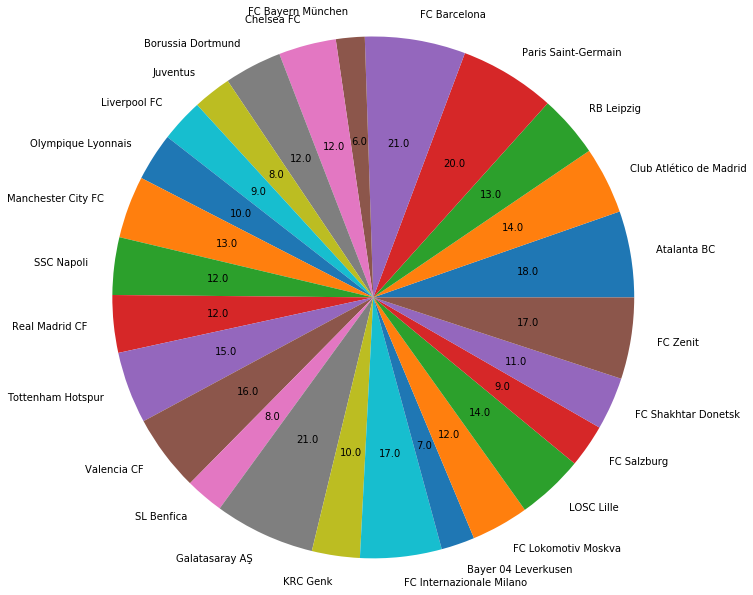

In [61]:
from pymongo import MongoClient
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display_html

# mongo configuration
myclient = MongoClient("mongodb://localhost:27017/")
mydb = myclient["uefa"]
mycol = mydb["players"]

#All of teams with yellow cards
total = [{}]
#Name of teams
teams = [{}]
#Amount of yellow cards the team has
score ={}

#returns team names
for item in mycol.find({},{ "_id" : 0, "team": 1}):
    teams.append(item)
    
#returns team names and yellow cards    
for item in mycol.find({},{ "_id" : 0, "team": 1, "yellow cards" : 1}):
    total.append(item)

#counter
i=0

for row in total:
    for item in row:
        #If the team name matches in both dics and is not empty
        if row["team"]==teams[i]["team"] and row["team"]!='' and isinstance(row["yellow cards"], int):
            #Team name variable
            team_name=row["team"]
            #If the team name exists
            if team_name in score:
                #Because of the fors, the number is divided by two
                score[team_name]+=row["yellow cards"]/2
            else:
                score[team_name]=row["yellow cards"]/2
    i=i+1

#four dicts for teams that dont have any cards, two cards, three cards and for teams that have four or more cards
zero_cards={}
#one_cards={}
two_cards={}
three_cards={}
some_cards={}

for k, v in score.items():
    if v == 0:
        zero_cards[k]=v
    #elif v == 1:
        #one_cards[k]=v
    elif v == 2:
        two_cards[k]=v
    elif v == 3:
        three_cards[k]=v
    else:
        some_cards[k]=v
        
#panda dataframe for the pie chart
df=pd.DataFrame(some_cards.items(), columns=['Team Name', 'Num of cards'])

#panda dataframe for teams with zero cards
zr=pd.DataFrame(zero_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with one card
#one=pd.DataFrame(one_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with two cards
two = pd.DataFrame(two_cards.keys(), columns=['Team Name'])
#panda dataframe for teams with three cards
th = pd.DataFrame(three_cards.keys(), columns=['Team Name'])

#function to round up number of cards
def absolute_value(val):
    
    a  = np.round(val/100.*df['Num of cards'].sum(), 0)
    return a

plt.pie(
    #the values are number of cards
    df['Num of cards'],
    # with the labels being team names
    labels=df['Team Name'],
    #this prints the number of cards to pie chart
    autopct=absolute_value,
    radius=3
    )

# View the plot
plt.show()

#create a table
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# fill table with zero cards
firstzr19 = zr.head(20)
lastzr19 = zr.tail(20)

firstzr15 = firstzr19.head(19)
secondzr15 = lastzr19.head(20)

# fill table with two card
firsttwo10 = two.head(10)
firsttwo5 = firsttwo10.head(5)

# fill table with three card
firstthree10 = th.head(10)
firstthree5 = firstthree10.head(5)

### Teams with zero cards

In [60]:
display_side_by_side(firstzr15, secondzr15)

,Team Name
0,AIK
1,APOEL FC
2,Ararat-Armenia FC
3,FC Astana
4,FC Basel 1893
5,FC BATE Borisov
6,Celtic FC
7,CFR 1907 Cluj
8,F.C. Copenhagen
9,F91 Dudelange


### No Teams with one card

### Teams with two cards

In [62]:
display_side_by_side(firsttwo5)

,Team Name
0,AFC Ajax
1,Club Brugge
2,FK Crvena zvezda
3,Olympiacos FC


### Teams with three cards

In [63]:
display_side_by_side(firstthree5)

,Team Name
0,GNK Dinamo Zagreb
1,SK Slavia Praha
